## Observations and Insights 

In [360]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [164]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique()) 


249

In [178]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df['Mouse ID'] !='g989']
#cleaned_df = merged_df.drop_duplicates(subset = ["Mouse ID", 'Timepoint'], keep = False)
#cleaned_df = merged_df.sort_values(['Mouse ID', 'Timepoint'], inplace = True)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [182]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique()) 



248

## Summary Statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_vol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_df = pd.DataFrame(mean_vol)
median_vol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_df["Median"] = median_vol
variance_vol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_df['Variance'] = variance_vol
std_vol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_df['Standard Deviation'] = std_vol
sem_vol = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df['Standard Error'] = sem_vol
summary_df.rename(columns={'Tumor Volume (mm3)':'Mean', },inplace=True)
summary_df


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Count of Mice Tested')

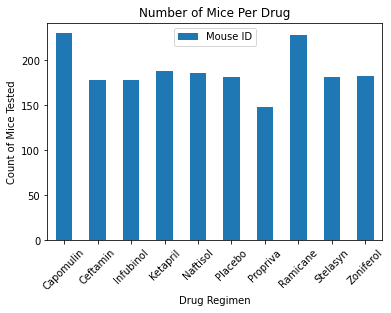

In [185]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_count = pd.DataFrame(cleaned_df.groupby('Drug Regimen')['Mouse ID'].count())
mice_drug_count.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Number of Mice Per Drug")
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Mice Tested')


Text(23.875, 0.5, 'Count of Mice Tested')

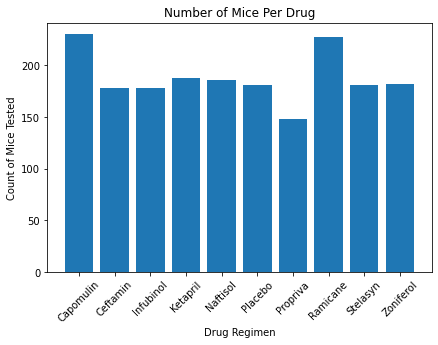

In [186]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_drug_count.reset_index(inplace=True)
plt.bar(mice_drug_count['Drug Regimen'], mice_drug_count['Mouse ID'])
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Number of Mice Per Drug")
plt.xlabel('Drug Regimen')
plt.ylabel('Count of Mice Tested')

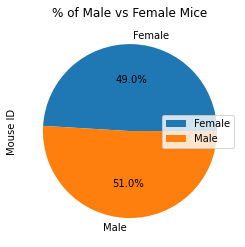

In [187]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.DataFrame(cleaned_df.groupby('Sex')['Mouse ID'].count())
sex_count.plot.pie(subplots = True, autopct="%1.1f%%")
plt.title('% of Male vs Female Mice')
plt.legend(loc='center right')


Text(0.5, 1.0, '% of Male vs Female Mice')

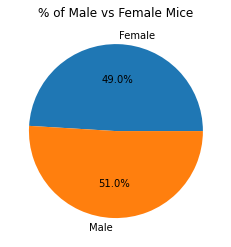

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count.reset_index(inplace=True)
labels = sex_count['Sex']
sizes = sex_count['Mouse ID']
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title('% of Male vs Female Mice')


## Quartiles, Outliers and Boxplots

In [254]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_df = cleaned_df.loc[cleaned_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_df = drug_df.groupby('Mouse ID')['Timepoint'].max()
max_df.reset_index()
max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_regimens_df = pd.merge(drug_df, max_df, on=['Mouse ID','Timepoint'])
last_regimens_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [314]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
treatments = []

box_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
box_df = pd.DataFrame(box_lists)
box_df.reset_index(inplace = True)
box_df

for column in box_df['Drug Regimen']:
    treatments.append(column)
treatments

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for drug in treatments:
    df = last_regimens_df.loc[(last_regimens_df['Drug Regimen'] == drug)]
    volumes = df['Tumor Volume (mm3)']  
    
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = [vol for vol in volumes if vol < lower_bound or vol > upper_bound]
    if len(outliers) == 0:
        print(f'There are {len(outliers)} outlies for {drug} volumes')
    else:
        print(f'There are {len(outliers)} outlies for {drug} volumes: {outliers}')


    #outliers.sort()
    #outliers

There are 0 outlies for Capomulin volumes
There are 0 outlies for Ceftamin volumes
There are 1 outlies for Infubinol volumes: [36.321345799999996]
There are 0 outlies for Ramicane volumes


<function matplotlib.pyplot.show(*args, **kw)>

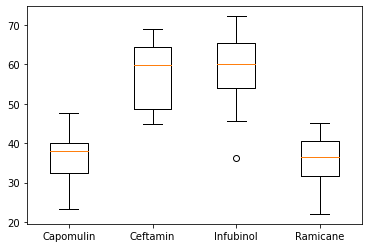

In [281]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
box_df = pd.DataFrame(box_lists)
box_df.reset_index(inplace = True)

volumes = [vol for vol in box_df['Tumor Volume (mm3)']]
plt.boxplot(volumes, labels=treatments)
plt.show


## Line and Scatter Plots

Text(0.5, 1.0, 'z969')

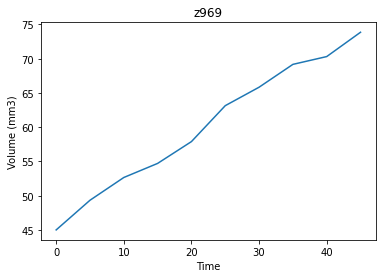

In [334]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
time_vs_tumer_df = cleaned_df.loc[cleaned_df["Mouse ID"]=="z969"]
time = np.arange(0,50,5)
volume = time_vs_tumer_df['Tumor Volume (mm3)']
time
plt.plot(time, volume)
plt.xlabel("Time")
plt.ylabel("Volume (mm3)")
plt.title('z969')


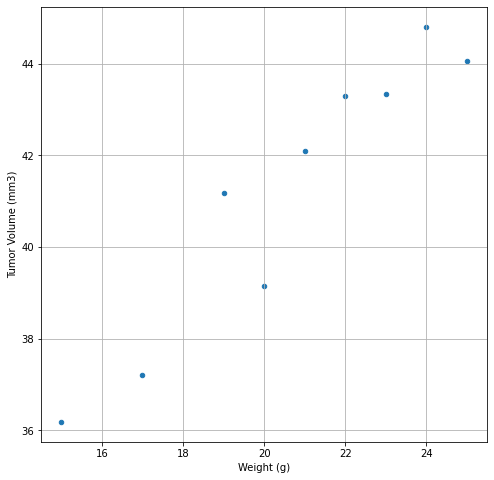

In [369]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
volume_vs_weight_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
volume_vs_weight_df = pd.DataFrame(volume_vs_weight_df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())
volume_vs_weight_df.reset_index(inplace=True)
volume_vs_weight_df
capomulin_scatter = volume_vs_weight_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

## Correlation and Regression

The correlation between both factors is 0.95


Text(0, 0.5, 'Tumor Volume (mm3)')

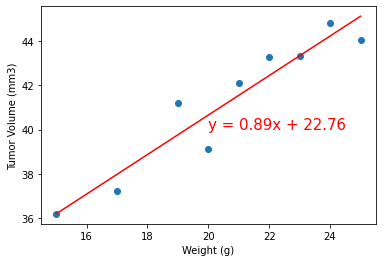

In [370]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = volume_vs_weight_df.iloc[:,0]
volume = volume_vs_weight_df.iloc[:,1]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
